# Law of Large Numbers (LLN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
#helper function
def lln_simulation(distribution, params, n_samples=1000, step=10):
    # Generate population samples
    population = distribution(*params, size=n_samples)
    pop_mean = np.mean(population)
    
    # Sample sizes for simulation
    sample_sizes = np.arange(step, n_samples+1, step)
    
    # Compute sample means for each sample size
    sample_means = [np.mean(population[:n]) for n in sample_sizes]
    
    return sample_sizes, sample_means, pop_mean, population

## Distributions for simulation


In [3]:
distributions = {
    "Normal(μ=50, σ=10)": (np.random.normal, (50, 10)),
    "Uniform(0,100)": (np.random.uniform, (0, 100)),
    "Exponential(λ=1)": (np.random.exponential, (1,))
}

## LLN Simulation Plots

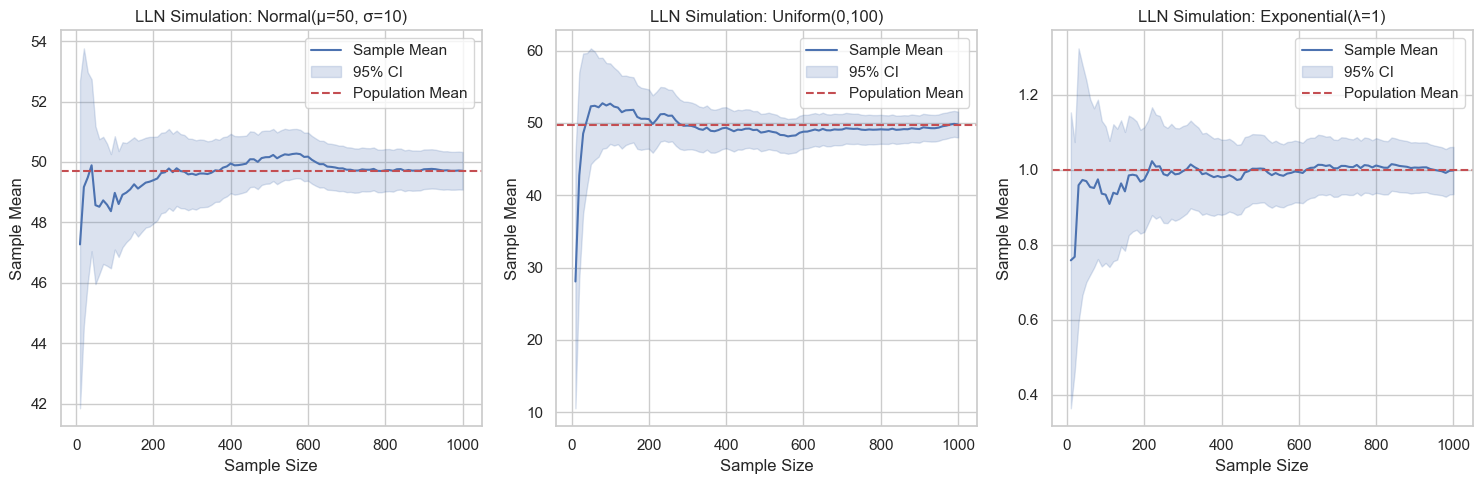

In [4]:
plt.figure(figsize=(15,5))

for i, (name, (dist_func, params)) in enumerate(distributions.items(), 1):
    sample_sizes, sample_means, pop_mean, population = lln_simulation(dist_func, params)
    
    # Confidence intervals for sample mean
    se = [np.std(population[:n])/np.sqrt(n) for n in sample_sizes]
    ci_upper = [m + 1.96*s for m, s in zip(sample_means, se)]
    ci_lower = [m - 1.96*s for m, s in zip(sample_means, se)]
    
    # Plot
    plt.subplot(1,3,i)
    plt.plot(sample_sizes, sample_means, label="Sample Mean", color="b")
    plt.fill_between(sample_sizes, ci_lower, ci_upper, color='b', alpha=0.2, label="95% CI")
    plt.axhline(y=pop_mean, color="r", linestyle="--", label="Population Mean")
    plt.title(f"LLN Simulation: {name}")
    plt.xlabel("Sample Size")
    plt.ylabel("Sample Mean")
    plt.legend()

plt.tight_layout()
plt.show()

In [5]:
print("LLN Simulation Summary:")
for name, (dist_func, params) in distributions.items():
    _, _, pop_mean, _ = lln_simulation(dist_func, params)
    print(f"- {name}: Population Mean ≈ {pop_mean:.2f}")

LLN Simulation Summary:
- Normal(μ=50, σ=10): Population Mean ≈ 50.02
- Uniform(0,100): Population Mean ≈ 49.56
- Exponential(λ=1): Population Mean ≈ 0.99
